In [1]:
import numpy as np
import pyquil.api as api
from grove.pyqaoa.maxcut_qaoa import maxcut_qaoa
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# on terminal one run qvm -S
# on another terminal run quilc -S

qvm_connection = api.QVMConnection()

first_graph = [(0, 1), (0, 2), (0, 3), (0, 4)]

In [3]:
#%%capture supresses printing. 
#get_angles() prints out a lot of stuff that we don't care about right now.
maxcut_solver = maxcut_qaoa(graph=first_graph)
betas, gammas = maxcut_solver.get_angles()

angles = np.hstack((betas, gammas))

                     models will be ineffective
	Parameters: [1.40758976 1.03284884] 
	E => -1.408191509402985
	Parameters: [1.55489567 0.97546835] 
	E => -1.9380942417861566
	Parameters: [1.69401791 0.71725614] 
	E => -2.444142546726447
	Parameters: [1.84132382 0.65987565] 
	E => -2.722234242720612
	Parameters: [1.84132382 0.65987565] 
	E => -2.6941883496987424
	Parameters: [1.84132382 0.65987565] 
	E => -2.720253765090394
	Parameters: [1.88019621 0.69573845] 
	E => -2.832014702069549
	Parameters: [1.88019621 0.69573845] 
	E => -2.848731664561679
	Parameters: [1.88019621 0.69573845] 
	E => -2.876229707627571
	Parameters: [1.90858328 0.81856857] 
	E => -2.9399430933196853
	Parameters: [1.90858328 0.81856857] 
	E => -2.917087492489361
	Parameters: [1.96503776 0.79817159] 
	E => -2.9522689457158986
	Parameters: [1.9371302  1.07442728] 
	E => -2.968880157732496
	Parameters: [1.9371302  1.07442728] 
	E => -2.9672307161376046
	Parameters: [1.96599678 1.59634319] 
	E => -2.999606997167054
	P

In [4]:
# We take a template for quil program from the maxcut_solver.
param_prog = maxcut_solver.get_parameterized_program()
# We initialize this program with the angles we have found
prog = param_prog(angles)
# Now we can print the program. 
# Some of the values you see here are the angles we calculated earlier.
print(prog)
print("Number of gates:", len(prog))

H 0
H 1
H 2
H 3
H 4
CNOT 0 1
RZ(1.5670120000810832) 1
CNOT 0 1
X 0
PHASE(0.7835060000405416) 0
X 0
PHASE(0.7835060000405416) 0
CNOT 0 2
RZ(1.5670120000810832) 2
CNOT 0 2
X 0
PHASE(0.7835060000405416) 0
X 0
PHASE(0.7835060000405416) 0
CNOT 0 3
RZ(1.5670120000810832) 3
CNOT 0 3
X 0
PHASE(0.7835060000405416) 0
X 0
PHASE(0.7835060000405416) 0
CNOT 0 4
RZ(1.5670120000810832) 4
CNOT 0 4
X 0
PHASE(0.7835060000405416) 0
X 0
PHASE(0.7835060000405416) 0
H 0
RZ(-3.9284328425028576) 0
H 0
H 1
RZ(-3.9284328425028576) 1
H 1
H 2
RZ(-3.9284328425028576) 2
H 2
H 3
RZ(-3.9284328425028576) 3
H 3
H 4
RZ(-3.9284328425028576) 4
H 4

Number of gates: 48


In [5]:
qubits = [0, 1, 2, 3]
measurements = qvm_connection.run_and_measure(prog, qubits, trials=1000)

In [6]:
# This is just a hack - we can't use Counter on a list of lists but we can on a list of tuples.
measurements = [tuple(measurement) for measurement in measurements]
measurements_counter = Counter(measurements)
# This line gives us the results in the diminishing order
measurements_counter.most_common()

[((1, 0, 0, 0), 270),
 ((0, 1, 1, 1), 263),
 ((1, 1, 0, 0), 53),
 ((0, 1, 0, 1), 52),
 ((0, 0, 1, 1), 52),
 ((1, 0, 0, 1), 46),
 ((1, 0, 1, 0), 43),
 ((1, 1, 1, 1), 41),
 ((0, 0, 0, 0), 40),
 ((0, 1, 1, 0), 39),
 ((1, 1, 1, 0), 25),
 ((0, 0, 1, 0), 18),
 ((1, 0, 1, 1), 15),
 ((1, 1, 0, 1), 15),
 ((0, 1, 0, 0), 15),
 ((0, 0, 0, 1), 13)]

In [7]:
# We create an array of angles with correct format
angles = np.hstack((betas, gammas))
print(angles)

[1.96421642 1.567012  ]


In [8]:
wf = qvm_connection.wavefunction(prog)
print("Probability amplitudes for all the possible states:")
for state_index in range(maxcut_solver.nstates):
    print(maxcut_solver.states[state_index], wf[state_index])

Probability amplitudes for all the possible states:
00000 (-0.19786097728000865+0.01602394394895401j)
00001 (-0.0006771853219997154+0.4762842433936306j)
00010 (-0.03321245221244762+0.08155112155832955j)
00011 (0.1969924418325057-0.01501729443859065j)
00100 (-0.033212452212447605+0.08155112155832953j)
00101 (0.19699244183250564-0.015017294438590678j)
00110 (0.03378816515778445-0.08140077032154076j)
00111 (0.03378816515778441-0.08140077032154083j)
01000 (-0.033212452212447584+0.0815511215583295j)
01001 (0.1969924418325057-0.015017294438590664j)
01010 (0.033788165157784475-0.08140077032154076j)
01011 (0.03378816515778443-0.08140077032154083j)
01100 (0.03378816515778445-0.08140077032154083j)
01101 (0.033788165157784475-0.08140077032154078j)
01110 (0.19699244183250575-0.01501729443859065j)
01111 (-0.03321245221244759+0.08155112155832951j)
10000 (-0.03321245221244759+0.08155112155832951j)
10001 (0.19699244183250575-0.01501729443859065j)
10010 (0.033788165157784475-0.08140077032154078j)
10011

In [9]:
print("Probabilities of measuring given states:")
states_with_probs = []
for state_index in range(maxcut_solver.nstates):
    states_with_probs.append([maxcut_solver.states[state_index], np.real(np.conj(wf[state_index])*wf[state_index])])
    print(states_with_probs[-1][0], states_with_probs[-1][1])

Probabilities of measuring given states:
00000 0.03940573310987932
00001 0.2268471390850035
00010 0.00775365240938556
00011 0.03903154127138846
00100 0.007753652409385555
00101 0.03903154127138844
00110 0.007767725513669951
00111 0.0077677255136699595
01000 0.007753652409385548
01001 0.03903154127138846
01010 0.0077677255136699526
01011 0.007767725513669961
01100 0.007767725513669962
01101 0.007767725513669954
01110 0.039031541271388484
01111 0.007753652409385551
10000 0.007753652409385551
10001 0.039031541271388484
10010 0.007767725513669954
10011 0.007767725513669962
10100 0.007767725513669961
10101 0.0077677255136699526
10110 0.03903154127138846
10111 0.007753652409385548
11000 0.0077677255136699595
11001 0.007767725513669951
11010 0.03903154127138844
11011 0.007753652409385555
11100 0.03903154127138846
11101 0.00775365240938556
11110 0.2268471390850035
11111 0.03940573310987932


In [10]:
def plot_state_histogram(states_with_probs):
    states = np.array(states_with_probs)[:,0]
    probs = np.array(states_with_probs)[:,1].astype(float)
    n = len(states_with_probs)
    plt.barh(range(n), probs, tick_label=states)
    plt.show()

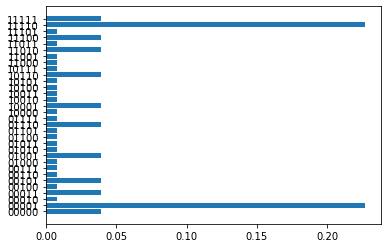

In [11]:
plot_state_histogram(states_with_probs)